In [672]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [673]:
data1= pd.read_csv(r"bank-additional/bank-additional.csv",sep=";")

In [674]:
data2=pd.read_csv(r"bank-additional/bank-additional-full.csv",sep=";")

In [675]:
comp_data=pd.concat([data1,data2],axis=0)

In [676]:
test = comp_data.drop_duplicates()
test.to_csv("Bank_Tableau.csv")

In [677]:
final_data=comp_data.drop_duplicates()

In [678]:
final_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [679]:
final_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [680]:
#final_data = final_data.drop('duration',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294225EF588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029427DEDEF0>]], dtype=object)

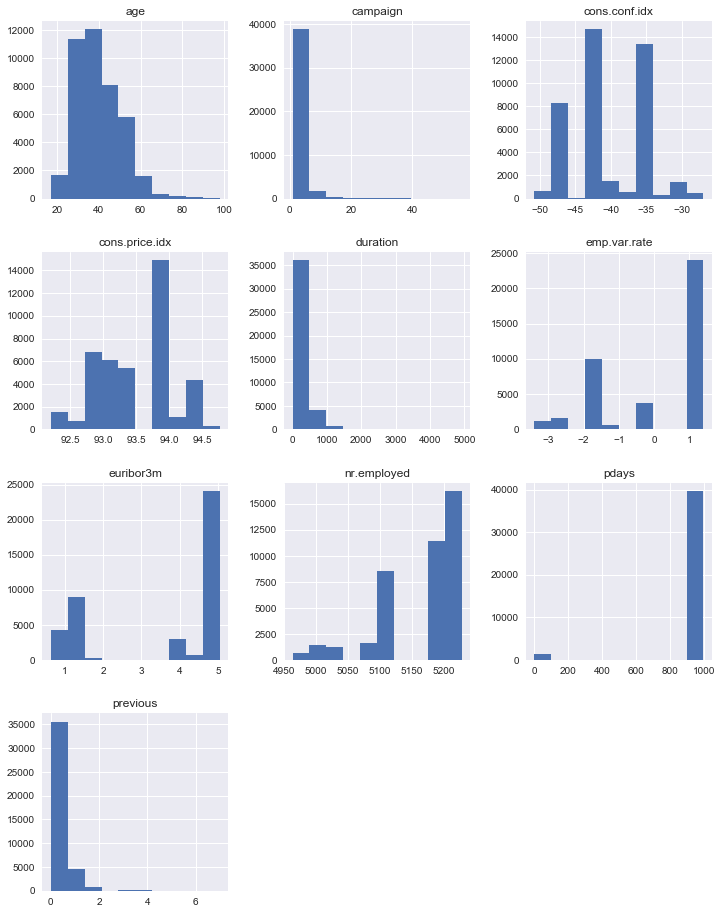

In [681]:
#Numerical data

final_data.hist(bins=10,figsize=(12,16))

In [682]:
final_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [683]:
from sklearn.preprocessing import LabelEncoder

In [684]:
f = LabelEncoder()
final_data['default-int'] = f.fit_transform(final_data['default'])
final_data['housing-int'] = f.fit_transform(final_data['housing'])
final_data['loan-int'] = f.fit_transform(final_data['loan'])
final_data['deposit-int'] = f.fit_transform(final_data['y'])

C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [685]:
crosstab = pd.crosstab(final_data['month'],final_data['deposit-int'])

In [686]:
crosstab.apply(lambda x:x/sum(x) *100,axis=0)

deposit-int,0,1
month,,
apr,5.725703,11.618883
aug,15.110710,14.119422
dec,0.254536,1.918517
jul,17.847661,13.968528
jun,13.025153,12.050011
mar,0.738977,5.949558
may,35.254673,19.098944
nov,10.082930,8.967450
oct,1.100255,6.790257


In [687]:
ls = [final_data]

In [688]:
for column in ls:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

    

C:\Users\sugan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sugan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [689]:
final_data['month_int'] = final_data['month_int'].astype('int64')

C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [690]:
final_data.drop(['y','day_of_week','month'],inplace=True,axis=1)

C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [691]:
final_data.rename(columns={'deposit-int':'deposit'},inplace=True)

C:\Users\sugan\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


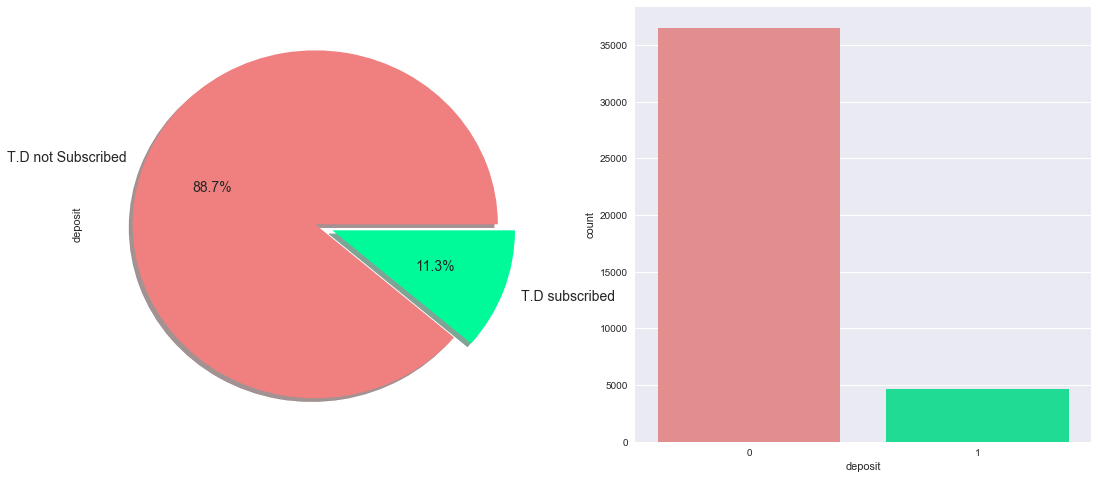

In [692]:
#Plot of count of output variable
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08080", "#00FA9A"]
labels = 'T.D not Subscribed','T.D subscribed'
final_data.deposit.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,fontsize=14,ax=ax[0],labels=labels,colors=colors)
sns.countplot(final_data.deposit,palette=colors)


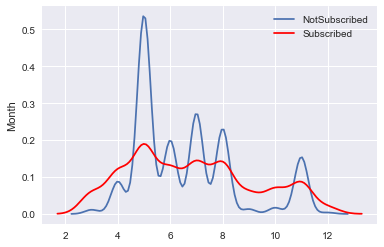

In [693]:
sns.kdeplot(final_data.loc[final_data.deposit==0,'month_int'],label='NotSubscribed')
sns.kdeplot(final_data.loc[final_data.deposit==1,'month_int'],color='red',label='Subscribed')
plt.ylabel('Month')

In [694]:
print(pd.crosstab(final_data.deposit,final_data.month_int))

month_int   3     4      5     6     7     8    9    10    11  12
deposit                                                          
0          270  2092  12881  4759  6521  5521  314  402  3684  93
1          276   539    886   559   648   655  256  315   416  89


In [695]:
final_data.loc[:,'Duration_min'] = final_data.duration.apply(lambda x:x/60)

C:\Users\sugan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sugan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


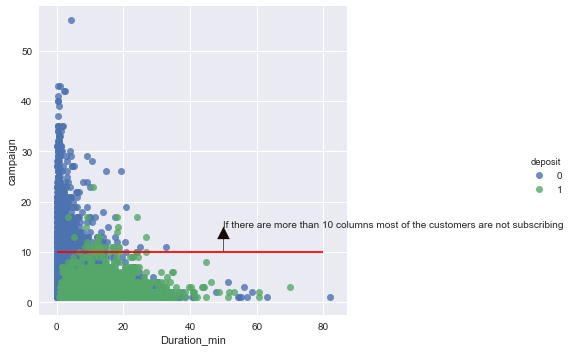

In [696]:
plt.figure(figsize=(10,16))
sns.lmplot('Duration_min','campaign',data=final_data,fit_reg=False,hue='deposit')
plt.hlines(y=10,xmin=0,xmax=80,colors='red')
plt.annotate("If there are more than 10 columns most of the customers are not subscribing",xy=(50,15),
            arrowprops=dict(facecolor='#190707', shrink=0.05))
plt.arrow(50,15,0,-5)

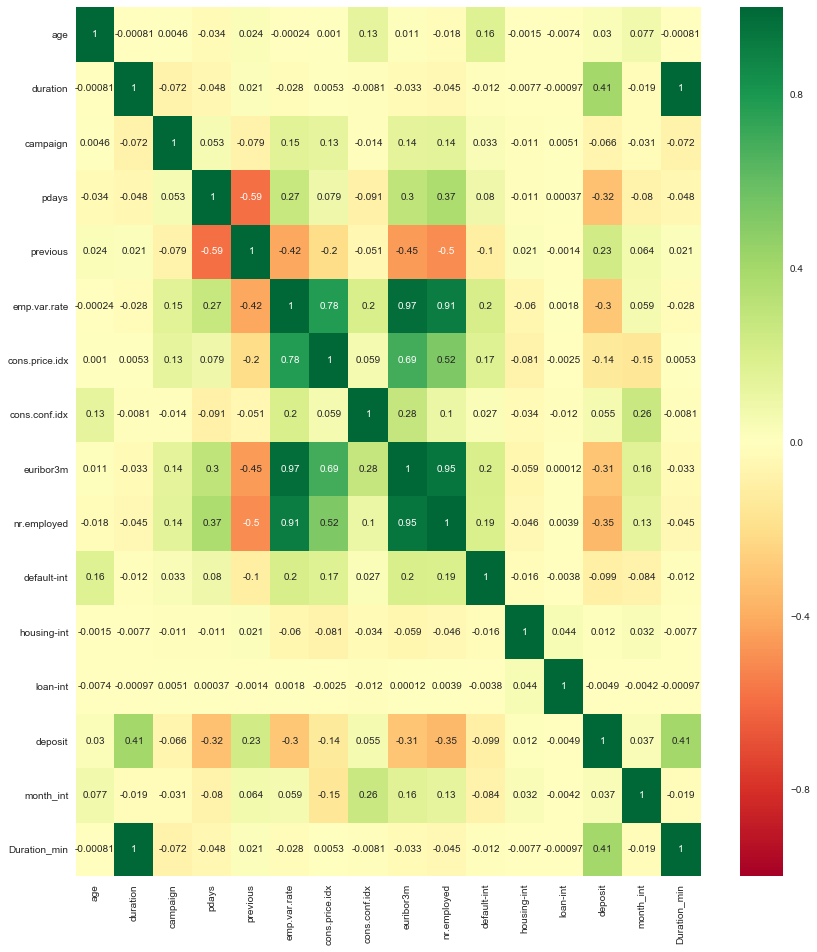

In [697]:
plt.figure(figsize=(14,16))
sns.heatmap(final_data.corr(),annot=True,cmap='RdYlGn')

In [698]:
final_data.reset_index(inplace=True,drop=True)

In [700]:
#Standard Scaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
Numerical=['age', 'campaign', 'pdays', 'previous','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',
          'nr.employed']
for a in Numerical:
    final_data[a]=scale.fit_transform(final_data[a])



C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\i

In [701]:
model_data=final_data[['age','housing','loan','default','job','education','campaign','pdays','previous','poutcome','cons.price.idx','cons.conf.idx',
                       'nr.employed','deposit']]

In [715]:
col=['job','housing','loan','default','education','poutcome']
col1=['age','previous','nr.employed','deposit']
mod_final_cat = pd.get_dummies(model_data[col])
mod_final_num = model_data[col1]
mod_final_df = pd.concat([mod_final_num,mod_final_cat],axis=1)


In [716]:
y = mod_final_df.deposit
X = mod_final_df.drop('deposit',axis=1)

In [718]:
#Classification Model - Building 
#Since the output is skewed lets do a stratified split

from sklearn.model_selection import StratifiedShuffleSplit

ssplit = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)


In [719]:
for train,test in ssplit.split(X,y):
    X_train=X.loc[train]
    y_train=y[train]
    X_test=X.loc[test]
    y_test=y.loc[test]
     

In [721]:
#Build a model
from sklearn.tree import DecisionTreeClassifier
class1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=50,min_samples_split=2)
class1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [722]:
pred1 = class1.predict(X_test)

In [729]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Accuracy-Overall",accuracy_score(y_test,pred1))
print("Precision",precision_score(y_test,pred1))
print("Recall",recall_score(y_test,pred1))



Accuracy-Overall 0.899700477617
Precision 0.709589041096
Recall 0.186063218391


0.89565225948669491

In [711]:
from sklearn.metrics import confusion_matrix

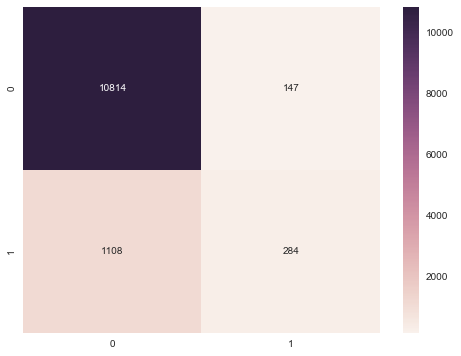

In [712]:
print("Accuracy-Overall",accuracy_score(y_test,pred1))
print("Precision",precision_score(y_test,pred1))
print("Recall",recall_score(y_test,pred1))
ax=plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,fmt='d',annot=True)

In [735]:
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

In [728]:
f1_score(y_test,pred1)

0.29482071713147412

In [790]:
pred1_train = class1.predict(X_train)
print("Accuracy-Overall",accuracy_score(y_train,pred1_train))
print("Precision",precision_score(y_train,pred1_train))
print("Recall",recall_score(y_train,pred1_train))
confusion_matrix(y_train,pred1_train)

Accuracy-Overall 0.899628768692
Precision 0.689102564103
Recall 0.198644902987


array([[25285,   291],
       [ 2602,   645]])

In [749]:
y_scores = cross_val_predict(class1, X_train, y_train, cv=3, method="predict_proba")

In [750]:
#probability of being a one(Yes) scores 
y_scores = y_scores[:,1]

In [778]:
y_scores[0:5]

array([ 0.06060213,  0.06060213,  0.0682243 ,  0.06060213,  0.06060213])

In [744]:
from sklearn.metrics import precision_recall_curve

In [775]:
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores)


pd.DataFrame({'d3':thresholds}).head()

,d3
0,0.000000
1,0.004202
2,0.022099
3,0.022576
4,0.025974


In [776]:
pd.DataFrame({'d1':precisions,'d2':recalls}).head()

,d1,d2
0,0.112653,1.000000
1,0.113032,0.998768
2,0.113247,0.996304
3,0.113445,0.994764
4,0.115448,0.986449


In [780]:
y_scores

array([ 0.06060213,  0.06060213,  0.0682243 , ...,  0.09577465,
        0.06403622,  0.0534926 ])

In [781]:
thresholds

array([ 0.        ,  0.00420168,  0.02209945,  0.02257636,  0.02597403,
        0.02713178,  0.02873563,  0.03211009,  0.0328152 ,  0.03470186,
        0.03532156,  0.03874092,  0.03887689,  0.03900415,  0.04923903,
        0.05178674,  0.0534926 ,  0.06060213,  0.06403622,  0.0682243 ,
        0.06845476,  0.07488987,  0.08695652,  0.09576362,  0.09577465,
        0.10502283,  0.13415074,  0.1495228 ,  0.20833333,  0.2371134 ,
        0.24590164,  0.25263158,  0.25384615,  0.26190476,  0.26436782,
        0.29      ,  0.29906542,  0.31612903,  0.32894737,  0.34334764,
        0.34655776,  0.34831461,  0.35106383,  0.37113402,  0.375     ,
        0.37974684,  0.39106145,  0.3974359 ,  0.40567951,  0.41176471,
        0.42857143,  0.45070423,  0.45918367,  0.48421053,  0.51834862,
        0.52631579,  0.54081633,  0.56      ,  0.56862745,  0.57303371,
        0.6       ,  0.63492063,  0.66129032,  0.68421053,  0.71      ,
        0.73770492,  0.73780488,  0.74545455,  0.76470588,  0.78

In [765]:
def precision_recall_curve_plot(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.3, linewidth=1, color="#0B3861")
#     plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
#              textcoords="offset points",
#             arrowprops=dict(facecolor='black', shrink=0.05),
#                 fontsize=12, 
#                 color='k')

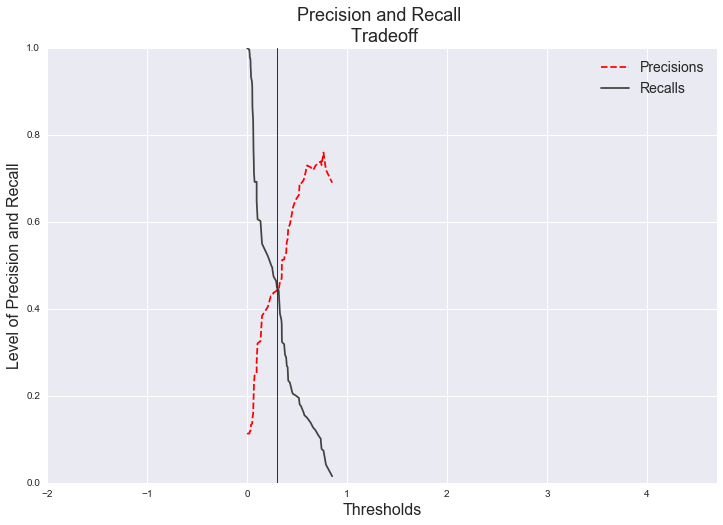

In [766]:
precision_recall_curve_plot(precisions, recalls, threshold)
plt.show()

In [782]:
from sklearn.metrics import roc_curve

In [783]:
dec_fpr,dec_tpr,threshold = roc_curve(y_train,y_scores)

In [788]:
dec_fpr

array([  0.00000000e+00,   8.60181420e-04,   2.07225524e-03,
         2.97153581e-03,   3.63622146e-03,   4.30090710e-03,
         4.53550203e-03,   5.04379105e-03,   5.70847670e-03,
         6.29496403e-03,   6.64685643e-03,   7.03784798e-03,
         8.40631842e-03,   8.75821082e-03,   9.22740069e-03,
         1.00875821e-02,   1.03221770e-02,   1.26681264e-02,
         1.37629027e-02,   1.50531749e-02,   1.61479512e-02,
         1.99405693e-02,   2.11135439e-02,   2.64701282e-02,
         2.75258054e-02,   3.26868940e-02,   3.38989678e-02,
         3.60103222e-02,   3.83171723e-02,   3.90209571e-02,
         4.02721301e-02,   5.16499844e-02,   5.44260244e-02,
         5.75148577e-02,   7.03784798e-02,   7.14732562e-02,
         7.48748827e-02,   7.75727244e-02,   7.88629966e-02,
         8.14435408e-02,   8.23428214e-02,   8.38676885e-02,
         8.49624648e-02,   9.72786988e-02,   1.12019080e-01,
         1.58273381e-01,   1.62847982e-01,   2.11917423e-01,
         2.62785424e-01,

In [787]:
threshold

array([ 1.85135135,  0.85135135,  0.7890625 ,  0.76470588,  0.74545455,
        0.73780488,  0.73770492,  0.71      ,  0.68421053,  0.66129032,
        0.63492063,  0.6       ,  0.57303371,  0.56862745,  0.56      ,
        0.54081633,  0.52631579,  0.51834862,  0.48421053,  0.45918367,
        0.45070423,  0.42857143,  0.41176471,  0.40567951,  0.3974359 ,
        0.39106145,  0.37974684,  0.375     ,  0.37113402,  0.35106383,
        0.34831461,  0.34655776,  0.34334764,  0.32894737,  0.31612903,
        0.29906542,  0.29      ,  0.26436782,  0.26190476,  0.25384615,
        0.25263158,  0.24590164,  0.2371134 ,  0.20833333,  0.1495228 ,
        0.13415074,  0.10502283,  0.09577465,  0.09576362,  0.08695652,
        0.07488987,  0.06845476,  0.0682243 ,  0.06403622,  0.06060213,
        0.0534926 ,  0.05178674,  0.04923903,  0.03900415,  0.03887689,
        0.03874092,  0.03532156,  0.03470186,  0.0328152 ,  0.03211009,
        0.02873563,  0.02713178,  0.02597403,  0.02257636,  0.02

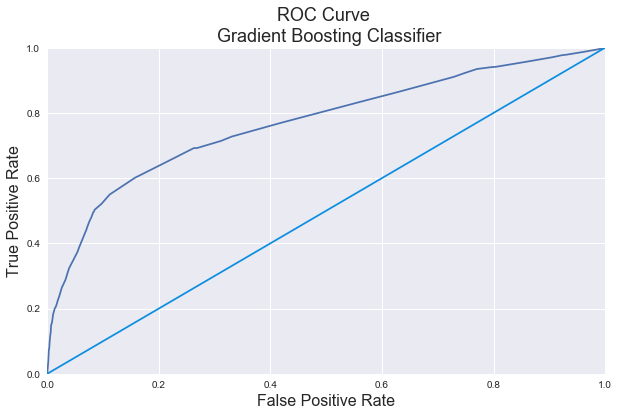

In [786]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
#     plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
#             arrowprops=dict(facecolor='#F75118', shrink=0.05),
#             )
#     plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
#                 arrowprops=dict(facecolor='#F75118', shrink=0.05),
#                 )
    
    
graph_roc_curve(dec_fpr, dec_tpr, threshold)
plt.show()

In [842]:
dec_fpr,dec_tpr,threshold = roc_curve(y_train,y_scores)

In [855]:
dec_tpr[threshold>0.4][-1]
dec_fpr[threshold>0.2][-1]

0.097278698780106351

In [792]:
from sklearn.metrics import roc_auc_score

In [793]:
roc_auc_score(y_train,y_scores)

0.76979149999051133

In [807]:
class1.predict_proba(X_train.iloc[1450,])

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.90237651,  0.09762349]])

In [808]:
class1.predict(X_train.iloc[1450,])

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)

In [811]:
y_train.iloc[1450]

0

(array([ 19826.,   4817.,    608.,    964.,   1350.,    300.,    292.,
           127.,    350.,    189.]),
 array([ 0.        ,  0.08513514,  0.17027027,  0.25540541,  0.34054054,
         0.42567568,  0.51081081,  0.59594595,  0.68108108,  0.76621622,
         0.85135135]),
 <a list of 10 Patch objects>)

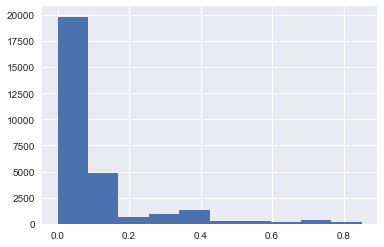

In [812]:
plt.hist(y_scores)

In [814]:
from sklearn.preprocessing import binarize

In [834]:
y_pred = binarize(y_scores,threshold=0.3)[0]

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [835]:
confusion_matrix(y_train,y_pred)

array([[23776,  1800],
       [ 1810,  1437]])

In [836]:
confusion_matrix(y_train,pred1_train)

array([[25285,   291],
       [ 2602,   645]])

In [837]:
recall_score(y_train,pred1_train)

0.19864490298737297

In [838]:
recall_score(y_train,y_pred)

0.44256236526024023

In [839]:
precision_score(y_train,y_pred)

0.44392956441149212